In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import statistics

lenna = cv2.imread("Lena.png") #reading lenna image
gray = cv2.cvtColor(lenna,cv2.COLOR_BGR2GRAY) #converting to grayscale

def noise(gray):  
    lst = []
    for x in range(1,11):
        gray2 = np.copy(gray)
        for i in range((gray.size//20)*x):
                y_coord=np.random.randint(0, gray.shape[0] - 1)
                x_coord=np.random.randint(0, gray.shape[1] - 1)
                 
                gray2[y_coord][x_coord] = 255
               
        for i in range((gray.size//20)*x):
                y_coord=np.random.randint(0, gray.shape[0] - 1)
                x_coord=np.random.randint(0, gray.shape[1] - 1)
                 
                gray2[y_coord][x_coord] = 0
        lst.append(gray2)     
        
    return lst

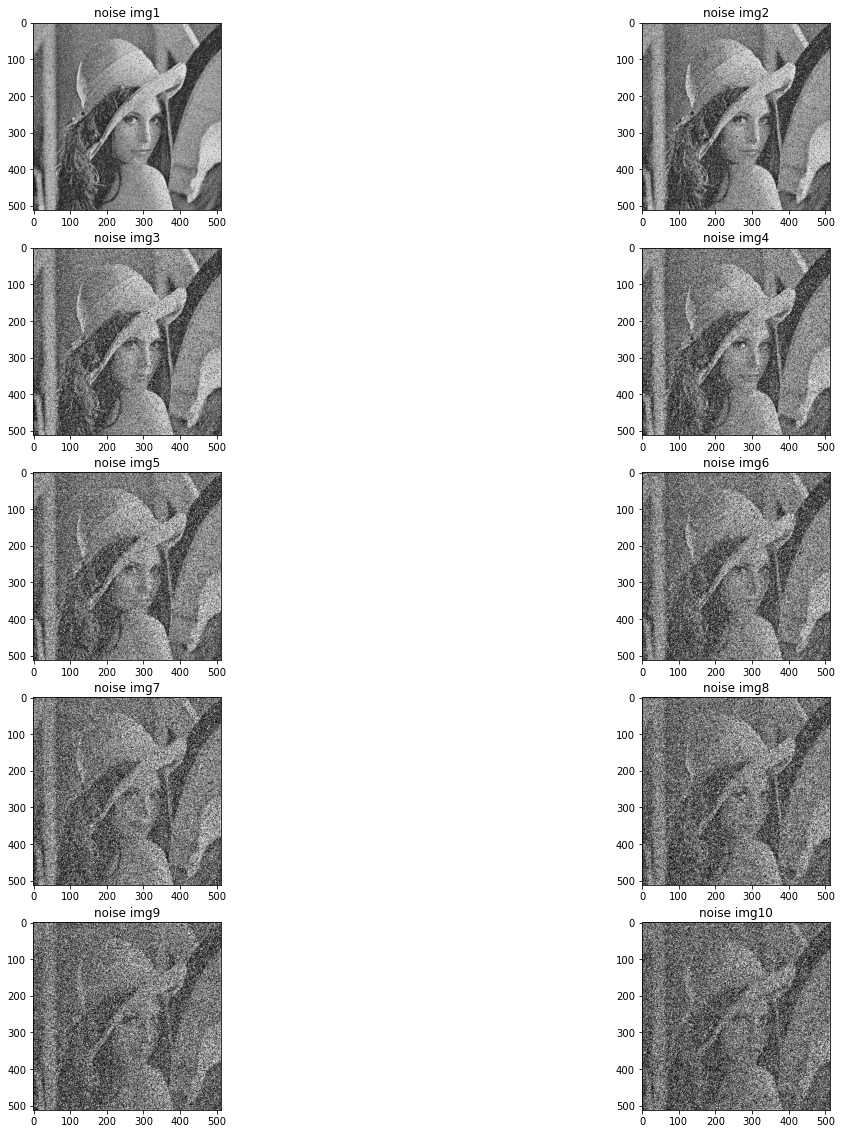

In [7]:
img = noise(gray)

#printing the images
images = img
titles = ["noise img1","noise img2","noise img3","noise img4","noise img5","noise img6","noise img7","noise img8","noise img9","noise img10"]

plt.figure(figsize=(20,20))

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(images[i],cmap="gray")
    plt.title(titles[i])
plt.show()

In [9]:
def median_filter(image):
    for i in range(len(image) - 1):
        for j in range(len(image) - 1):
            #(i,j) are the coordinates of the pixel
            #Pixel neighbours including itself
            neighbours = [(i,j), (i, j-1), (i, j+1), (i-1, j-1), (i-1, j), (i-1, j+1), (i+1, j-1), (i+1,j), (i+1, j+1)]
        
            if(i == 0):
                neighbours.remove((i-1,j-1))
                neighbours.remove((i-1,j))
                neighbours.remove((i-1,j+1))
            if(j == 0):
                if (i-1, j-1) in neighbours:
                    neighbours.remove((i-1,j-1))
                if (i, j-1) in neighbours:
                    neighbours.remove((i,j-1))
                if (i+1, j-1) in neighbours:
                    neighbours.remove((i+1,j-1))
            if(i == 511):
                if (i+1, j-1) in neighbours:
                    neighbours.remove((i-1,j-1))
                if (i+1, j) in neighbours:
                    neighbours.remove((i+1,j))
                if (i+1, j+1) in neighbours:
                    neighbours.remove((i+1,j+1)) 
            if(j == 511):
                if (i-1, j+1) in neighbours:
                    neighbours.remove((i-1,j+1))
                if (i, j+1) in neighbours:
                    neighbours.remove((i,j+1))
                if (i+1, j+1) in neighbours:
                    neighbours.remove((i+1,j+1)) 
            
            neigh_pix = []
            for pos in neighbours:
                neigh_pix.append(image[(pos)])
            
            neigh_pix.sort()
            image[i][j] = statistics.median(neigh_pix)
    
    return image

final = []
for i in img:
    res = median_filter(i)
    final.append(res)

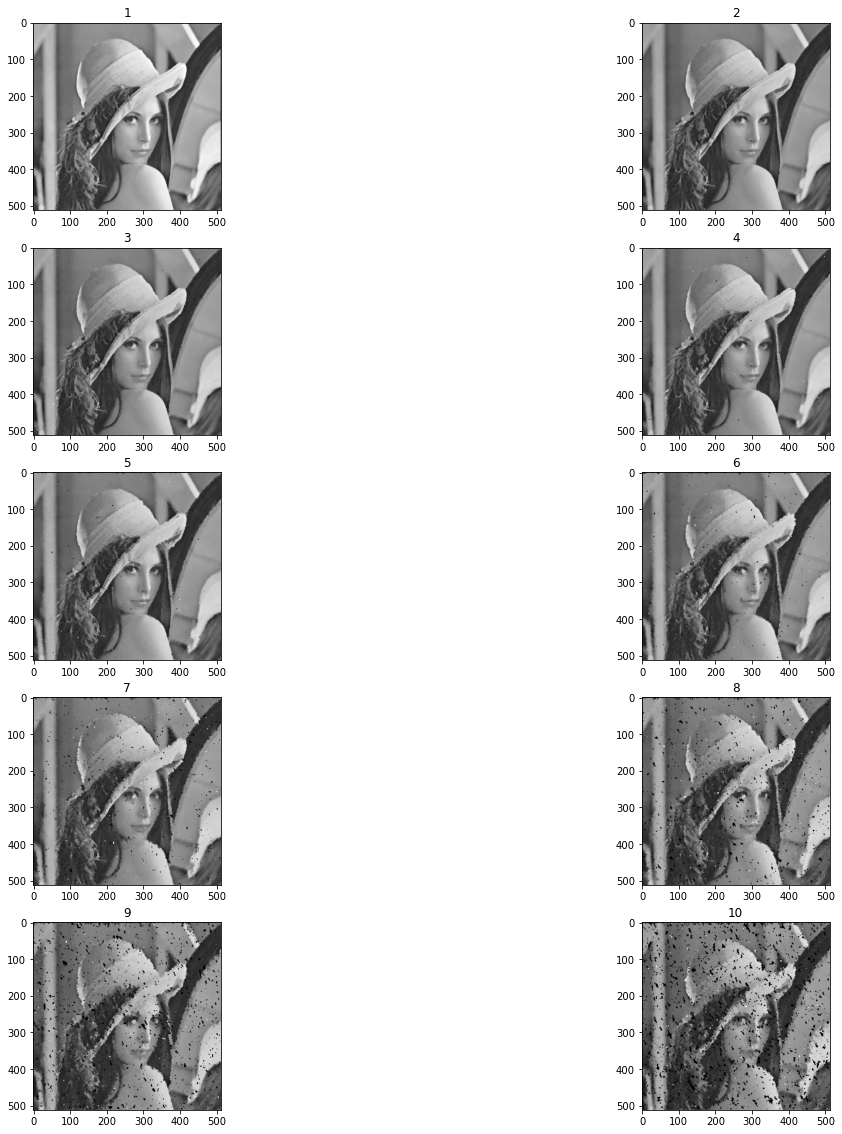

In [10]:
#printing the images
images = final
titles = ['1','2','3','4','5','6','7','8','9','10']
plt.figure(figsize=(20,20))

for i in range(len(final)):
    plt.subplot(5,2, i+1)
    plt.imshow(images[i],cmap="gray")
    plt.title(titles[i])
plt.show()